In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### Data Cleaning

# The data in the 2015 files (Casualties and Vehicles) contained an extra column, which was needed to filter out. So I used  the data only till 2014.

data = pd.read_csv('full_data.csv')


In [2]:
small_data = data[['Urban_or_Rural_Area', 'Sex_of_Driver', 'Date']]

In [3]:
rural_data = small_data.loc[small_data['Urban_or_Rural_Area']==2]

In [4]:
rural_data.head()

,Urban_or_Rural_Area,Sex_of_Driver,Date
12217,2,1,02/03/2005
12218,2,1,02/03/2005
12230,2,1,15/04/2005
12231,2,1,15/04/2005
12232,2,3,15/04/2005


In [7]:
data_males = rural_data.loc[rural_data['Sex_of_Driver']==1]
data_females = rural_data.loc[rural_data['Sex_of_Driver']==2]

males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

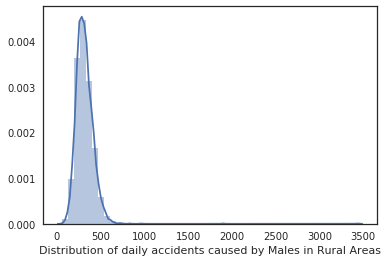

In [8]:
sns.distplot(males_dist, axlabel='Distribution of daily accidents caused by Males in Rural Areas')

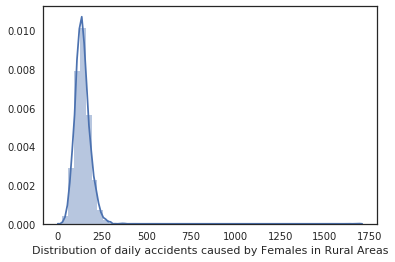

In [9]:
sns.distplot(females_dist, axlabel='Distribution of daily accidents caused by Females in Rural Areas')

In [10]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals of the difference of the means**

In [11]:
z_score = 1.645

In [13]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

In [14]:
ci_max

181.97890853436553

In [15]:
ci_min

175.5605219147035

As we can see, the confidence interval contains a zero, we can perform the Wald's test to see if the hypothesis holds.

**Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by females are more than that of males i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{f} > \mu_{m}$

In [20]:
statistic = (mean_females - mean_males)/(np.sqrt(male_var+females_var))
statistic

-1.5163469708171984

Since the Wald's test statistic is less than Z_score of 90%, we will accept the Null Hypothesis and reject the alternate hypothesis.

In [21]:
p_value = 1-stats.wald.cdf(statistic)
p_value

1.0

As we can see, the p value is very high, so we accept the Null Hypothesis.